# Lab: Modello ML di base con Dataset Meteo + Integrazione MLflow

In questo laboratorio, affrontiamo un percorso step-by-step:

1. **Caricare e preparare un dataset meteo** (con dati di temperatura e umidità) per prevedere se pioverà o meno.
2. **Addestrare un modello di Machine Learning** con Scikit-learn.
3. **Valutare il modello** e comprendere i risultati.
4. **Estendere il progetto** integrando **MLflow** per tracciare metriche, parametri e versioni del modello.

La prima parte si concentra su Scikit-learn e il dataset meteo. La seconda parte estende il codice esistente con MLflow.

---


## Parte 0: Setup dell'Environment per Python

#### **Requisiti**

Questo laboratorio assume che Python sia già installato, la repository [kiratech/labs](https://github.com/kiratech/labs.git) sia accessibile e che Git sia configurato correttamente sul computer locale.

### 1. Clonare la Repository
Per iniziare, clona la repository del laboratorio eseguendo il seguente comando:

```sh
git clone https://github.com/kiratech/labs.git
```

### 2. Fare il Checkout del Branch Lab

Dopo aver clonato la repository, entra nella cartella del progetto:

```sh
cd labs
```

Quindi, fai il checkout del branch `lab`:

```sh
git checkout academy-ai
```
In questa cartella sono presenti le risorse relative ai laboratori con tema AI.

### 3. Spostarsi nella Cartella 1-Intro-To-ML-And-MLOps

Naviga nella cartella del primo laboratorio:

```sh
cd AI/Academy/1-Intro-To-ML-And-MLOps
```

### 4. Apri il progetto in VSCode

A questo punto apri VSCode dall'explorer oppure lanciando il comando:
```sh
code .
```

### 5. Creare un Virtual Environment

Un ambiente virtuale permette di isolare le dipendenze del progetto da quelle di sistema.

Tramite il terminale di VSCode, crea un ambiente virtuale:

```sh
python -m venv venv
```

Attiva l'Ambiente Virtuale

- **Su macOS e Linux:**
  
  ```sh
  source venv/bin/activate
  ```
  
- **Su Windows:**
  
  ```sh
  venv\Scripts\activate
  ```

Dovresti vedere il prefisso `(venv)` nel terminale, indicando che l'ambiente virtuale è attivo.

### 6. Installare i pacchetti da `requirements.txt`

Tramite il file `requirements.txt`, possiamo installare tutte le dipendenze di questo laboratorio, in particolare **scikit-learn** e **MLflow**, eseguendo il comando:

```sh
pip install -r src/requirements.txt
```

Verifica che i pacchetti siano stati installati correttamente con:

```sh
pip list
```
A questo punto si può continuare sul file `lab.ipynb`.

---

## Parte 1: Dai dati al modello ML (Supervised Learning con Scikit-learn)

**Obiettivo**
- Creare un semplice **modello di classificazione** per predire la pioggia basandoci su dati di temperatura e umidità.


### 1. Preparazione del Dataset

Per semplicità, qui useremo un dataset di esempio:
[Weather Test Data](https://raw.githubusercontent.com/boradpreet/Weather_dataset/refs/heads/master/Weather%20Test%20Data.csv)

In [9]:
import pandas as pd

# URL del dataset (sostituiscilo con il tuo link)
url = "https://raw.githubusercontent.com/boradpreet/Weather_dataset/refs/heads/master/Weather%20Test%20Data.csv"

# Carica il dataset
df = pd.read_csv(url)

# Mostra le prime righe
df.head(5)



,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


###  2. Esplorazione e pulizia dei Dati
1. Controlliamo se ci sono valori mancanti
2. Trasformiamo la colonna `Label` in una variabile binaria (0 = NoRain, 1 = Rain)
3. Selezione delle feature 

In [10]:
# 1. Rimozione dei valori mancanti
df = df.dropna()

# 2. Conversione della colonna 'RainToday' in valori numerici
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Selezione delle feature 
features = ['MinTemp', 'MaxTemp', 'Humidity3pm', 'Humidity9am']

X = df[features]
y = df['RainToday']


### 3. Suddivisione del Dataset in Training e Test

Prima di addestrare il modello, dividiamo il dataset in:
- **X** (features) → Temperatura, Umidità
- **y** (target) → Label (Rain/NoRain)

In [11]:
from sklearn.model_selection import train_test_split

# Suddivisione dei dati (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dimensioni del dataset di training: {len(X_train)}")
print(f"Dimensioni del dataset di test: {len(X_test)}")

Dimensioni del dataset di training: 13476
Dimensioni del dataset di test: 3370


###  4. Creazione e Addestramento del Modello

Utilizziamo un classificatore semplice, ad esempio [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Creazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5. Valutazione del Modello

Calcoliamo l’accuratezza del modello e altre metriche. Inoltre, visualizziamo la matrice di confusione ovvero un metodo visivo per valutare le prestazioni di un modello.

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Predizioni sul set di test
y_pred = model.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.2f}")

# Report di classificazione
print(classification_report(y_test, y_pred))

Accuratezza del modello: 0.82
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2649
           1       0.61      0.42      0.50       721

    accuracy                           0.82      3370
   macro avg       0.73      0.67      0.69      3370
weighted avg       0.80      0.82      0.81      3370



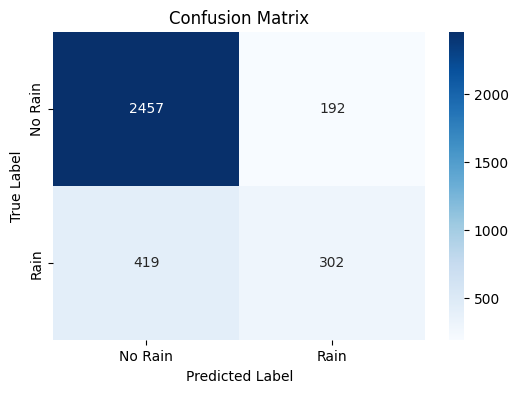

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Creiamo una heatmap con Seaborn
target_names = ["No Rain", "Rain"]
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)

# Aggiungiamo i titoli
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Mostriamo il grafico
plt.show()

### Conclusione (Parte 1)
In questa prima parte, abbiamo:
1. Caricato un dataset relativo alle condizioni meteo
2. Pulito i dati e trasformato la variabile target
3. Suddiviso il dataset in training e test
4. Creato un modello di classificazione con RandomForest
5. Valutato le prestazioni con accuratezza e matrice di confusione

---

## Tech: Installazione e Configurazione di MLflow
###  Obiettivo
- Configurare un'istanza MLflow in locale per registrare esperimenti.
###  1. Avviare MLflow

Esegui il seguente comando per avviare un'istanza locale di MLflow:
```bash
mlflow ui
```
In questo modo MLflow espone l'interfaccia grafica di MLflow all'indirizzo:
```
http://127.0.0.1:5000
```
Questa configurazione salva artefatti ed esperimenti in locale. 

### MLflow in Produzione
Nel contesto produttivo e presso i clienti, non si esegue MLflow in locale. 
Generalmente si scelgono soluzioni che permettono un'architettura più robusta e scalabile, evitando problemi di gestione manuale degli esperimenti e della persistenza dei dati.
Le soluzioni comuni includono:
- **Docker Compose**: Un file docker-compose.yml viene utilizzato per avviare MLflow con un database backend e uno storage remoto.  
Una soluzione basata su questo metodo può essere trovata nella repository interna [kiratech/mlops-service-portfolio](https://github.com/kiratech/mlops-service-portfolio/tree/main).
- **Kubernetes**: MLflow viene distribuito su un cluster Kubernetes, garantendo scalabilità e gestione centralizzata.  

Entrambe le opzioni si basano su una soluzione multi-container dove sono presenti un database persistente e un storage S3, in genere soluzioni cloud o MinIO. 


---

## Parte 2: Integrazione con MLflow

Adesso, estendiamo il codice esistente per **tracciare i nostri esperimenti** con **MLflow**. Questo ci permetterà di:
- Loggare i nostri parametri (es. `n_estimators`)
- Salvare l’accuratezza e altre metriche
- Salvare il modello e ricaricarlo facilmente

### Obiettivo
- Integrare MLflow nel codice esistente per versionare e tracciare le metriche del modello.

### 1. Setup MLflow
Impostiamo le variabili di MLflow per questo esperimento:

In [ ]:
import mlflow
import mlflow.sklearn

# Impostiamo un nome per l'esperimento
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("weather_classification_experiment")

Verifichiamo che dalla nostra interfaccia grafica il nuovo esperimento sia visibile.

### 2. Logging dei Parametri e Metriche

Possiamo loggare:
- Parametri → `n_estimators` e altre impostazioni
- Metriche → accuratezza
- Modello → versione del modello addestrato


In [ ]:
# Usando il modello creato nella Parte 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators = 100

# Creiamo una nuova run MLflow
with mlflow.start_run():
    # Log Param
    mlflow.log_param("n_estimators", n_estimators)

    # Creazione del modello
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)

    # Calcolo metriche
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Salviamo il modello
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print(f"Esperimento concluso. Accuratezza registrata: {accuracy:.2f}")

###  3. Visualizzare e Confrontare i Risultati

MLflow fornisce un’interfaccia web per esplorare tutte le run ed esperimenti.

```bash
http://127.0.0.1:5000
```

Accedi all’URL indicato nel terminale. Nella sezione **Experiments** potrai vedere:
- Parametri loggati
- Metriche
- Modelli salvati

### 4. Caricare un Modello Salvato con MLflow

Copiando l'id della run dell'esperimento eseguito, possiamo recuperare un modello da MLflow per fare previsioni future.

In [ ]:
import mlflow.sklearn
from sklearn.metrics import accuracy_score

# Inserisci un run_id reale che trovi nell'interfaccia MLflow
RUN_ID = "<run_id_della_tua_run>"

loaded_model = mlflow.sklearn.load_model(f"runs:/{RUN_ID}/random_forest_model")

# Verifichiamo l'accuratezza
y_loaded_pred = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_loaded_pred)
print(f"Accuratezza del modello caricato: {acc_loaded:.2f}")

È possibile notare che con lo stesso dataset di test, il modello ha precisamente la stessa accuratezza.

## Conclusioni
In questo laboratorio abbiamo:
1. **Creato un modello di classificazione con Scikit-learn** su un dataset meteo.
2. **Aggiunto MLflow** per tracciare parametri, metriche e gestire le versioni del modello.
3. **Visualizzato i risultati** con l’interfaccia MLflow UI e ricaricato il modello salvato.


## Prossimi Passi
- Provare iperparametri diversi (`n_estimators`, `max_depth`, ecc.) e confrontare i risultati su MLflow.
- Integrare un sistema di **continuous integration/continuous deployment (CI/CD)** per distribuire automaticamente il modello.
- Monitorare in produzione il drift del modello (eventuali cali di accuratezza).